## STAT 5261 Project

Arsh Misra am6490


## Step 2: Save each company's data as a separate CSV file

In [ ]:
import os
import pandas as pd

def load_csvs_to_dict(folder_name):
    data_dict = {}

    # Ensure the folder exists
    if not os.path.exists(folder_name):
        print(f"Error: Folder '{folder_name}' does not exist.")
        return data_dict

    # Iterate through the files in the folder
    for file in os.listdir(folder_name):
        if file.endswith(".csv"):  # Ensure only CSV files are processed
            file_path = os.path.join(folder_name, file)
            df_name = os.path.splitext(file)[0]  # Extract name without extension
            data_dict[df_name] = pd.read_csv(file_path, index_col=0)  # Read CSV with index

    return data_dict

# Test Code
folder = "2018_to_2024"
data_frames1 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames1.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames1.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

Error: Folder '2018_to_2024' does not exist.
Loaded DataFrames: []


In [ ]:
import pandas as pd

def combine_columns_from_df_dict(df_dict, n=0):
    """
    Combine the ith column from each DataFrame in df_dict into a new DataFrame.

    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary of dataframes with the same shape.
    - n (int): Number of columns to iterate over. If 0, use all columns.

    Returns:
    - result_dict (dict of pd.DataFrame): Dictionary with column names as keys and
      DataFrames with ith columns from all input DataFrames as values.
    """
    # Assume all dataframes have the same shape and columns
    first_df = next(iter(df_dict.values()))
    total_cols = len(first_df.columns)
    n = total_cols if n == 0 else min(n, total_cols)

    result_dict = {}

    for i in range(n):
        col_name = first_df.columns[i]
        combined_df = pd.DataFrame({
            key: df.iloc[:, i] for key, df in df_dict.items()
        })
        result_dict[col_name] = combined_df

    return result_dict

data_frames2 = combine_columns_from_df_dict(data_frames1, n=10)

for name, df in data_frames2.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:3, :5])  # Display first 5 rows and first 5 columns

StopIteration: 

In [ ]:
import re

def save_df_dict_to_csv(df_dict, folder_name):
    """
    Save each DataFrame in df_dict to a CSV file in the specified folder.

    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary with DataFrames as values.
    - folder_name (str): Folder where CSV files will be saved.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)

    # Save each DataFrame as a CSV file
    for name, df in df_dict.items():
        # Replace illegal characters in filename
        safe_name = re.sub(r'[\\/:"*?<>|]', '-', name)
        file_path = os.path.join(folder_name, f"{safe_name}.csv")
        df.to_csv(file_path, index=True)


save_df_dict_to_csv(data_frames2, "2018_to_2024_by_companies")

In [ ]:
# Test Code
folder = "2018_to_2024_by_companies"
data_frames3 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames3.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames3.items():
    print(f"\nDataFrame: {name}")
    pd.to_datetime(df.index)
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

In [ ]:
index_name_list = data_frames3.keys()
print(index_name_list)

In [ ]:
single_index_df = data_frames3['US (S&P 500)']

single_index_df.index = pd.to_datetime(single_index_df.index)
print(single_index_df.index)

### Step 3: Visualize Original Data For a Single Index

In [ ]:
import matplotlib.pyplot as plt

def plot_stock_data(df):
    """
    Plots OHLC data and Volume data from a stock DataFrame.

    Parameters:
    - df (pd.DataFrame): A DataFrame with columns ["Close", "High", "Low", "Open", "Volume"]
                         and datetime index.
    """
    fig, ax1 = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Plot Close, High, Low, Open
    ax1[0].plot(df.index, df["Close"], label="Close")
    ax1[0].plot(df.index, df["High"], label="High")
    ax1[0].plot(df.index, df["Low"], label="Low")
    ax1[0].plot(df.index, df["Open"], label="Open")
    ax1[0].set_ylabel("Price")
    ax1[0].set_title("Stock Prices (OHLC)")
    ax1[0].legend()
    ax1[0].grid(True)

    # Plot Volume
    ax1[1].plot(df.index, df["Volume"], color='gray', label="Volume")
    ax1[1].set_ylabel("Volume")
    ax1[1].set_title("Trading Volume")
    ax1[1].legend()
    ax1[1].grid(True)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

plot_stock_data(single_index_df)

In [ ]:
import pandas as pd

def filter_close_by_year(df, year):
    """
    Filters the 'Close' column of a DataFrame for the specified year.

    Parameters:
    - df (pd.DataFrame): DataFrame with a DateTime index and a 'Close' column.
    - year (str): A string representing the year to filter by (e.g., '2018').

    Returns:
    - pd.Series: Filtered 'Close' values for the specified year.
    """
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DateTimeIndex.")

    try:
        year_int = int(year)
    except ValueError:
        raise ValueError(f"Invalid year: {year}. Must be a 4-digit number string.")

    return df[df.index.year == year_int]["Close"]

# Test the function
year = "2018"
filtered_close = filter_close_by_year(single_index_df, year)

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(filtered_close.index, filtered_close.values, color="green", marker='.', label=f"Close Prices in {year}")
plt.title(f"Close Prices in {year}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
type(filtered_close.index)

In [ ]:
def find_extrema_points(series, window_size):
    """
    Finds indices where the middle value of each window is equal to the max or min.

    Parameters:
    - series (pd.Series): Time series data with a DateTimeIndex.
    - window_size (int): Size of each sliding window.

    Returns:
    - (list, list): Tuple of two lists containing the indices of local maxima and minima.
    """
    if not isinstance(series.index, pd.DatetimeIndex):
        raise ValueError("The input series must have a DateTimeIndex.")
    if window_size < 1:
        raise ValueError("Window size must be at least 1.")

    max_indices = []
    min_indices = []

    for i in range(0, len(series) - window_size + 1):
        window = series.iloc[i:i + window_size]
        mid_idx = i + window_size // 2  # choose first middle value if even
        mid_value = series.iloc[mid_idx]
        window_max = window.max()
        window_min = window.min()
        mid_timestamp = series.index[mid_idx]

        if mid_value == window_max:
            max_indices.append(mid_timestamp)
        elif mid_value == window_min:
            min_indices.append(mid_timestamp)

    return max_indices, min_indices

# Test the function
year = "2023"
close_df = filter_close_by_year(single_index_df, year)

close_df = single_index_df['Close']

window_size = 50
max_pts, min_pts = find_extrema_points(close_df, window_size)

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(close_df.index, close_df.values, label="Apple Closing Price", color='blue')
plt.scatter(max_pts, close_df[max_pts], color='red', label='Local Max', zorder=5)
plt.scatter(min_pts, close_df[min_pts], color='green', label='Local Min', zorder=5)

title = f"Extrema Points (Window Size = {window_size})"
plt.title(title)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(title, dpi=300, bbox_inches='tight')
plt.show()

## Step 4: Calculate Technical Indicators
### Compute Volatility Based on Daily Returns

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as krs
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Import data

import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)



Mounted at /content/drive


In [ ]:


folder_path = '/content/drive/My Drive/Stats_Project_Data/2018_to_2024_by_companies'  # <-- change this

# List everything in the folder
print("Files in folder:")
print(os.listdir(folder_path))




Files in folder:
['Germany (DAX).csv', 'Japan (Nikkei 225).csv', 'India (Nifty 50).csv', 'France (CAC 40).csv', 'Korea (KOSPI).csv', 'US (S&P 500).csv', 'UK (FTSE 100).csv', 'China (SSE Composite Index).csv', 'Canada (S&P-TSX Composite).csv']


In [ ]:
import os
import pandas as pd

def load_csvs_to_dict(folder_path):
    data_frames = {}
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            full_path = os.path.join(folder_path, file)
            df = pd.read_csv(full_path, index_col=0)  # assumes first column is index
            name = os.path.splitext(file)[0]
            data_frames[name] = df
    return data_frames


In [ ]:
# Load and process
data_frames4 = load_csvs_to_dict(folder_path)

# Access a specific DataFrame
single_index_df = data_frames4['US (S&P 500)']

# Convert index to datetime
single_index_df.index = pd.to_datetime(single_index_df.index)

# Display index
print(single_index_df.index)

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-14', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1372, freq=None)


In [ ]:
import numpy as np
import pandas as pd

def add_daily_return(df):
    df = df.copy()
    if 'Close' not in df.columns:
        raise ValueError("Missing 'Close' column")
    df['return (n=1)'] = np.log(df['Close'] / df['Close'].shift(1))
    return df

def add_volatility(df, n):
    df = df.copy()
    if 'Close' not in df.columns:
        print("Warning: 'Close' column not found. Skipping return calculation.")
        return df
    if 'return (n=1)' not in df.columns:
        df = add_daily_return(df)
    col_name = f"volatility (n={n})"
    df[col_name] = df['return (n=1)'].rolling(window=n).std() / (n**0.5)
    return df

def add_moving_average(df, n):
    df = df.copy()
    df[f'ma_{n}'] = df['Close'].rolling(window=n).mean()
    return df


def add_rsi(df, n=14):
    df = df.copy()
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=n).mean()
    avg_loss = loss.rolling(window=n).mean()
    rs = avg_gain / avg_loss
    df[f'rsi_{n}'] = 100 - (100 / (1 + rs))
    return df

def add_macd(df):
    df = df.copy()
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['macd'] = ema12 - ema26
    df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
    return df

def add_bollinger_bands(df, n=20):
    df = df.copy()
    ma = df['Close'].rolling(window=n).mean()
    std = df['Close'].rolling(window=n).std()
    df['bollinger_upper'] = ma + 2 * std
    df['bollinger_lower'] = ma - 2 * std
    return df

def add_roc(df, n=10):
    df = df.copy()
    df[f'roc_{n}'] = df['Close'].pct_change(periods=n)
    return df

def add_atr(df, n=14):
    df = df.copy()
    high_low = df['High'] - df['Low']
    high_close = (df['High'] - df['Close'].shift()).abs()
    low_close = (df['Low'] - df['Close'].shift()).abs()
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df[f'atr_{n}'] = tr.rolling(window=n).mean()
    return df

# Ensure we're working with a clean copy to avoid chained assignment issues
single_index_df = data_frames4['US (S&P 500)'].copy()

# Apply all indicators
single_index_df = add_daily_return(single_index_df)
single_index_df = add_volatility(single_index_df, n=20)
single_index_df = add_moving_average(single_index_df, n=20)
single_index_df = add_ema(single_index_df, n=20)
single_index_df = add_rsi(single_index_df, n=20)
single_index_df = add_macd(single_index_df)
single_index_df = add_bollinger_bands(single_index_df, n=20)
single_index_df = add_roc(single_index_df, n=20)
single_index_df = add_stochastic_oscillator(single_index_df, k_window=14, d_window=3)
single_index_df = add_atr(single_index_df, n=14)

# Final check
print(single_index_df)


                  Close         High          Low         Open        Volume  \
Date                                                                           
2018-02-06  2695.139893  2701.040039  2593.070068  2614.780029  5.917350e+09   
2018-02-07  2681.659912  2727.669922  2681.330078  2690.949951  4.646300e+09   
2018-02-08  2581.000000  2685.270020  2580.560059  2685.010010  5.333840e+09   
2018-02-09  2619.550049  2638.669922  2532.689941  2601.780029  5.690110e+09   
2018-02-14  2698.629883  2702.100098  2648.870117  2651.209961  4.011940e+09   
...                 ...          ...          ...          ...           ...   
2024-12-19  5867.080078  5935.520020  5866.069824  5912.709961  4.896880e+09   
2024-12-20  5930.850098  5982.060059  5832.299805  5842.000000  8.223220e+09   
2024-12-23  5974.069824  5978.250000  5902.569824  5940.250000  3.593280e+09   
2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922  3.159610e+09   
2024-12-30  5906.939941  5940.790039  58

In [ ]:
def add_ema(df, n):
    df = df.copy()
    df[f'ema_{n}'] = df['Close'].ewm(span=n, adjust=False).mean()
    return df

def add_stochastic_oscillator(df, k_window=14, d_window=3):
    df = df.copy()
    low_min = df['Low'].rolling(window=k_window).min()
    high_max = df['High'].rolling(window=k_window).max()
    df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
    df['%D'] = df['%K'].rolling(window=d_window).mean()
    return df

In [ ]:
single_index_df = single_index_df.dropna()
single_index_df.head()

,Close,High,Low,Open,Volume,return (n=1),volatility (n=20),ma_20,ema_20,rsi_20,macd,macd_signal,bollinger_upper,bollinger_lower,roc_20,%K,%D,atr_14
Date,,,,,,,,,,,,,,,,,,
2018-03-19,2712.919922,2741.379883,2694.590088,2741.379883,3.327460e+09,-0.014306,0.003198,2724.064014,2731.937721,51.655804,13.415782,14.876473,2826.466354,2621.661673,0.006597,29.464884,48.886287,34.345738
2018-03-20,2716.939941,2724.219971,2710.050049,2715.050049,3.272590e+09,0.001481,0.003186,2725.828015,2730.509361,53.344458,10.570775,14.015334,2826.353003,2625.303027,0.013156,32.651584,40.856122,32.976458
2018-03-22,2643.689941,2695.679932,2641.590088,2691.360107,3.765460e+09,-0.027331,0.002866,2728.962512,2722.240845,56.268615,2.378011,11.687869,2813.036484,2644.888541,0.024289,1.309872,21.142113,35.149309
2018-03-23,2588.260010,2657.669922,2585.889893,2646.709961,3.829380e+09,-0.021190,0.002978,2727.398010,2709.480765,46.973358,-8.489682,7.652359,2820.702502,2634.093518,-0.011945,1.097226,11.686227,36.849313
2018-03-26,2658.550049,2661.360107,2601.810059,2619.350098,3.538080e+09,0.026795,0.002902,2725.394019,2704.630221,46.056069,-11.300325,3.861822,2822.926012,2627.862026,-0.014852,33.637402,12.014833,38.332171


In [ ]:
single_index_df.shape

(1352, 18)

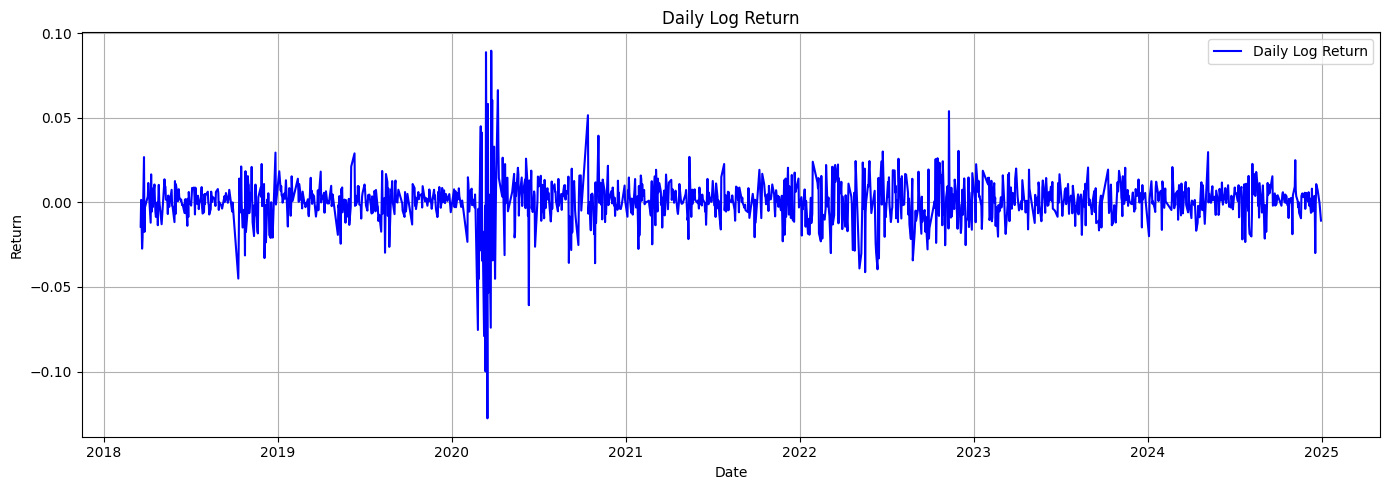

In [ ]:
import matplotlib.pyplot as plt

# Plot daily return
plt.figure(figsize=(14, 5))
plt.plot(single_index_df.index, single_index_df['return (n=1)'], label='Daily Log Return', color='blue')
plt.title("Daily Log Return")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

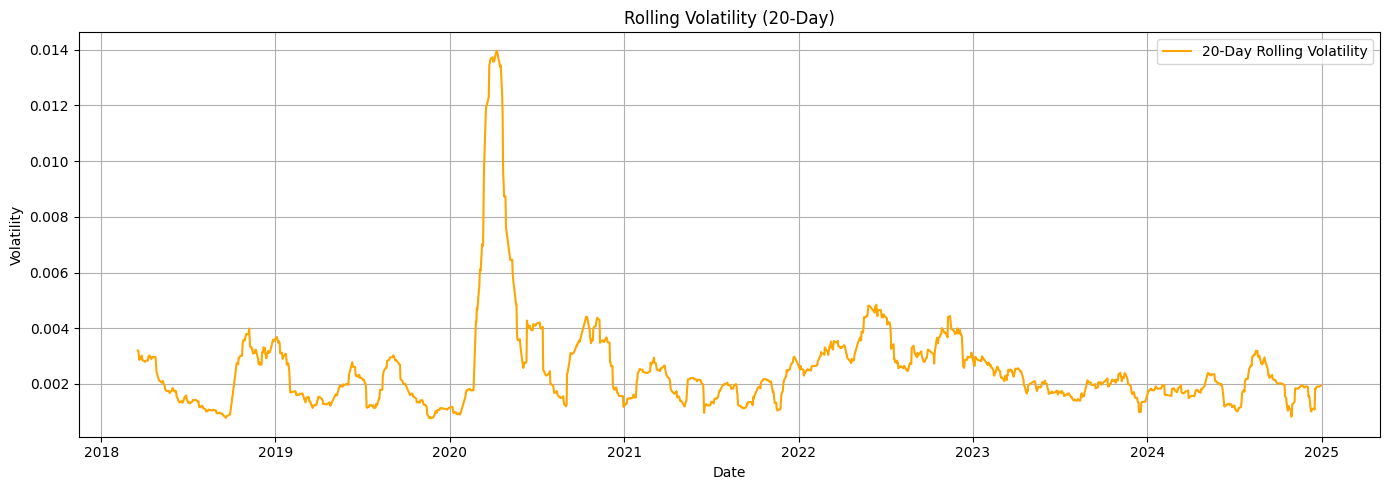

In [ ]:
# Plot rolling volatility (example: 20-day window)
plt.figure(figsize=(14, 5))
plt.plot(single_index_df.index, single_index_df['volatility (n=20)'], label='20-Day Rolling Volatility', color='orange')
plt.title("Rolling Volatility (20-Day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Step 5 --- Create Pipeline to Add Technical Indicators

In [ ]:
folder_path = '/content/drive/My Drive/Stats_Project_Data/2018_to_2024_by_companies'
data_frames1 = load_csvs_to_dict(folder_path)

data_frames2 = combine_columns_from_df_dict(data_frames1, n=10)

folder2 = '/content/drive/My Drive/Stats_Project_Data/2018_to_2024_by_companies'
save_df_dict_to_csv(data_frames2, folder2)


NameError: name 'combine_columns_from_df_dict' is not defined

In [ ]:
import os
import pandas as pd
import numpy as np

def process_csv_files(folder_name, function_list):
    """
    Open a folder and loop through all CSV files inside it.
    For each file, read the CSV into a DataFrame, apply each function in function_list,
    and save the modified DataFrame back to the same file.

    Each function in function_list should take a DataFrame as input and return a modified DataFrame.
    """
    if not os.path.isdir(folder_name):
        print(f"The folder '{folder_name}' does not exist.")
        return

    for filename in os.listdir(folder_name):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_name, filename)
            # print(file_path)
            try:
                df = pd.read_csv(file_path)
                for func in function_list:
                    df = func(df)
                df = df.dropna()
                df.to_csv(file_path, index=False)
                print(f"Updated '{filename}' — shape: {df.shape}")
            except Exception as e:
                print(f"Failed to process '{filename}': {e}")



function_list = [
    add_daily_return,
    lambda df: add_volatility(df, n=20)  # use a lambda if your function takes extra parameters
]

folder2 = "2018_to_2024_by_companies"
process_csv_files(folder2, function_list)

The folder '2018_to_2024_by_companies' does not exist.


## Split Train and Test Data

In [ ]:
# Make sure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Update the folder path for Drive
folder = '/content/drive/My Drive/2018_to_2024_by_companies'

# Load the CSVs into a dictionary
data_frames5 = load_csvs_to_dict(folder)  # Make sure this function is already defined

# Extract the specific DataFrame you're working with
single_index_df = data_frames5['US (S&P 500)'].copy()

# Ensure the index is in datetime format
single_index_df.index = pd.to_datetime(single_index_df.index)

# Check the index
print(single_index_df.index)


DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-14', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1372, freq=None)


In [ ]:
single_index_df.head(5)

,Close,High,Low,Open,Volume,return (n=1),volatility (n=20),ma_20,ema_20,rsi_20,macd,macd_signal,bollinger_upper,bollinger_lower,roc_20,%K,%D,atr_14
Date,,,,,,,,,,,,,,,,,,
2018-03-19,2712.919922,2741.379883,2694.590088,2741.379883,3.327460e+09,-0.014306,0.003198,2724.064014,2731.937721,51.655804,13.415782,14.876473,2826.466354,2621.661673,0.006597,29.464884,48.886287,34.345738
2018-03-20,2716.939941,2724.219971,2710.050049,2715.050049,3.272590e+09,0.001481,0.003186,2725.828015,2730.509361,53.344458,10.570775,14.015334,2826.353003,2625.303027,0.013156,32.651584,40.856122,32.976458
2018-03-22,2643.689941,2695.679932,2641.590088,2691.360107,3.765460e+09,-0.027331,0.002866,2728.962512,2722.240845,56.268615,2.378011,11.687869,2813.036484,2644.888541,0.024289,1.309872,21.142113,35.149309
2018-03-23,2588.260010,2657.669922,2585.889893,2646.709961,3.829380e+09,-0.021190,0.002978,2727.398010,2709.480765,46.973358,-8.489682,7.652359,2820.702502,2634.093518,-0.011945,1.097226,11.686227,36.849313
2018-03-26,2658.550049,2661.360107,2601.810059,2619.350098,3.538080e+09,0.026795,0.002902,2725.394019,2704.630221,46.056069,-11.300325,3.861822,2822.926012,2627.862026,-0.014852,33.637402,12.014833,38.332171


In [ ]:
def split_time_series(df, test_size=0.2, split_date=None):
    """
    Splits a time series DataFrame into train and test sets.

    Parameters:
    - df (pd.DataFrame): Time series DataFrame with date-based rows.
    - test_size (float): Fraction of data to use for testing (ignored if split_date is provided).
    - split_date (str or pd.Timestamp): Optional. Split point as a date (e.g., '2022-01-01').

    Returns:
    - train_df (pd.DataFrame): Training set
    - test_df (pd.DataFrame): Testing set
    """

    # Ensure index is sorted
    df = df.sort_index()

    if split_date is not None:
        train_df = df[df.index < split_date]
        test_df = df[df.index >= split_date]
    else:
        split_point = int(len(df) * (1 - test_size))
        train_df = df.iloc[:split_point]
        test_df = df.iloc[split_point:]

    print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
    return train_df, test_df

# Assume df has date index
single_index_df.index = pd.to_datetime(single_index_df.index)

# OR use a specific split date
train_df, test_df = split_time_series(single_index_df, split_date="2021-01-01")
print(train_df.shape, test_df.shape)

# 70/30 split
train_df, test_df = split_time_series(single_index_df, test_size=0.3)
print(train_df.shape, test_df.shape)

Train shape: (554, 18), Test shape: (798, 18)
(554, 18) (798, 18)
Train shape: (946, 18), Test shape: (406, 18)
(946, 18) (406, 18)


## Prepare Data for LSTM

In [ ]:
min_max_1 = (single_index_df.min(), single_index_df.max())
min_max_1[0], min_max_1[1]

(Close                2.237400e+03
 High                 2.300730e+03
 Low                  2.191860e+03
 Open                 2.290710e+03
 Volume               1.639500e+09
 return (n=1)        -1.276522e-01
 volatility (n=20)    7.618824e-04
 ma_20                2.555192e+03
 ema_20               2.577030e+03
 rsi_20               1.831469e+01
 macd                -2.316848e+02
 macd_signal         -1.906292e+02
 bollinger_upper      2.696240e+03
 bollinger_lower      2.133928e+03
 roc_20              -3.361403e-01
 %K                   0.000000e+00
 %D                   8.553881e-01
 atr_14               1.713002e+01
 dtype: float64,
 Close                6.090270e+03
 High                 6.099970e+03
 Low                  6.079980e+03
 Open                 6.089030e+03
 Volume               9.976520e+09
 return (n=1)         8.968323e-02
 volatility (n=20)    1.396728e-02
 ma_20                6.025832e+03
 ema_20               6.022737e+03
 rsi_20               9.053774e+01
 ma

In [ ]:
import numpy as np

def prepare_data_for_lstm(df, window_size, target, period, min_max=None):
    """
    Splits a DataFrame into overlapping windows of a given size.

    Parameters:
    - df (pd.DataFrame): Input DataFrame of shape (n, m)
    - window_size (int): Number of rows per window

    Returns:
    - result (list of np.ndarray): List of arrays, each of shape (window_size, m)
    """
    assert window_size > period, 'window_size need to be greater than perdiction period'
    print("Original DataFrame shape:", df.shape)

    input_list = []
    output_list = []

    col_min = 0
    col_range = 1
    if min_max is not None:
        col_min = min_max[0]
        col_max = min_max[1]
        col_range = col_max - col_min
    # print(col_range)
    # print(col_min)

    for i in range(len(df) - window_size + 1):
        input_rows = df.iloc[i:i + window_size - period]
        input_rows = (input_rows - col_min) / col_range
        target_row = df.iloc[i+window_size-1 : i+window_size]
        target_row = (target_row - col_min) / col_range

        target_val = target_row[target]

        input_rows = input_rows.to_numpy()
        input_list.append(input_rows)
        output_list.append(target_val)

    input_array = np.array(input_list)
    output_array = np.array(output_list)


    return input_array, output_array

# Dummy data
# df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'])

# Apply function with window size 4
lstm_input, lstm_output = prepare_data_for_lstm(single_index_df, window_size=40, target='volatility (n=20)', period=5)
print("Final result array shape:", lstm_input.shape, lstm_output.shape)

Original DataFrame shape: (1352, 18)
Final result array shape: (1313, 35, 18) (1313, 1)


In [ ]:
lstm_train_input, lstm_train_output = prepare_data_for_lstm(train_df, window_size=40, target='volatility (n=20)', period=1, min_max=min_max_1)
print("Final result array shape:", lstm_train_input.shape, lstm_train_output.shape)

lstm_test_input, lstm_test_output = prepare_data_for_lstm(test_df, window_size=40, target='volatility (n=20)', period=1, min_max=min_max_1)
print("Final result array shape:", lstm_test_input.shape, lstm_test_output.shape)

Original DataFrame shape: (946, 18)
Final result array shape: (907, 39, 18) (907, 1)
Original DataFrame shape: (406, 18)
Final result array shape: (367, 39, 18) (367, 1)


### Prepare Data for Regular Neural Network / Most other models

In [ ]:
import numpy as np

def prepare_data_for_regular_model(df, window_size, target, period):
    """
    Splits a DataFrame into overlapping windows of a given size.

    Parameters:
    - df (pd.DataFrame): Input DataFrame of shape (n, m)
    - window_size (int): Number of rows per window

    Returns:
    - result (list of np.ndarray): List of arrays, each of shape (window_size, m)
    """
    assert window_size > period, 'window_size need to be greater than perdiction period'
    print("Original DataFrame shape:", df.shape)

    input_list = []
    output_list = []

    for i in range(len(df) - window_size + 1):
        input_rows = df.iloc[i:i + window_size - period]
        target_row = df.iloc[i+window_size-1 : i+window_size]

        target_val = target_row[target]

        input_rows = input_rows.to_numpy()
        flat_array = input_rows.flatten()
        input_list.append(flat_array)
        output_list.append(target_val)

    input_array = np.array(input_list)
    output_array = np.array(output_list)


    return input_array, output_array

# Dummy data
# df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'])

# Apply function with window size 4
regular_train_input, regular_train_output = prepare_data_for_regular_model(train_df, window_size=15, target='volatility (n=20)', period=1)
print("Final result array shape:", regular_train_input.shape, regular_train_output.shape)

NameError: name 'train_df' is not defined

In [ ]:
regular_test_input, regular_test_output = prepare_data_for_regular_model(test_df, window_size=15, target='volatility (n=20)', period=1)
print("Final result array shape:", regular_test_input.shape, regular_test_output.shape)

Original DataFrame shape: (406, 18)
Final result array shape: (392, 252) (392, 1)


## Build LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

input_shape = lstm_train_input.shape[1:]

lstm_model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape= input_shape),  # First LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(units=64, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(units=25),  # Fully connected layer
    Dense(units=1)  # Output layer (predicting next day's spot price)
])

# Compile the model
lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 39, 128)        │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,323 (493.45 KB)

 Trainable params: 126,323 (493.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
lstm_history = lstm_model.fit(lstm_train_input, lstm_train_output, epochs=20, batch_size=16)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0334
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0036
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0031
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0022
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0018
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0020
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0016
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0014
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0013
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0015
Epoch 13/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8.8262e-04
Epoch 14/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0011
Epoch 15/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0010


In [ ]:
# Evaluate the model
test_loss = lstm_model.evaluate(lstm_test_input, lstm_test_output)
print(f"Test Loss: {test_loss:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010    
Test Loss: 0.0018


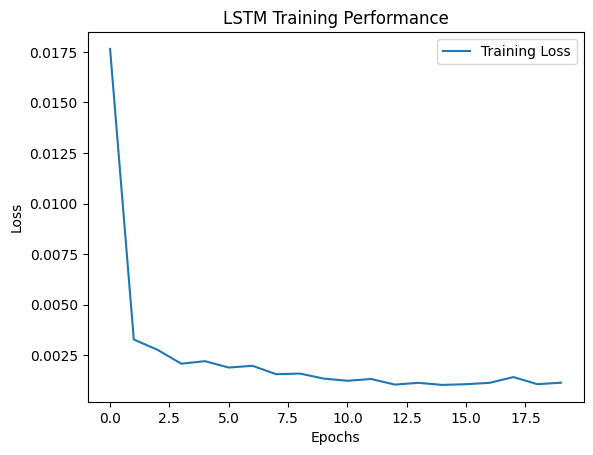

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LSTM Training Performance")
plt.savefig("LSTM train history.png", dpi=300, bbox_inches='tight')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


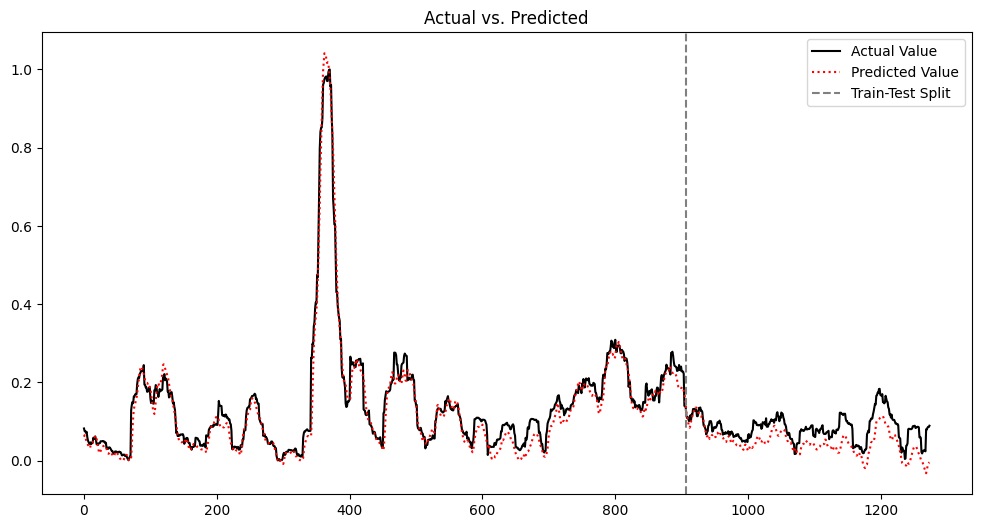

In [ ]:
def visualize_predictions(model, X_train, y_train, X_test, y_test, df, title=""):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Create a combined actual spot price series
    actual_spot_prices = np.concatenate([y_train, y_test])
    predicted_spot_prices = np.concatenate([y_train_pred.flatten(), y_test_pred.flatten()])

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(actual_spot_prices, color="black", label="Actual Value")
    plt.plot(predicted_spot_prices, color="red", linestyle="dotted", label="Predicted Value")
    # plt.plot(futures_prices_all, color="red", linestyle="dotted", label="Futures Price")

    # Mark the transition between training and test sets
    plt.axvline(len(y_train), color="gray", linestyle="--", label="Train-Test Split")
    plt.title("Actual vs. Predicted")
    plt.legend()
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()

visualize_predictions(lstm_model, lstm_train_input, lstm_train_output, lstm_test_input, lstm_test_output, single_index_df, "lstm_prediction")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test).flatten()

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2})

    return pd.DataFrame(results)

models2 = {
    "LSTM": lstm_model
}

results_dl = evaluate_models(models2, lstm_test_input, lstm_test_output)  # Deep learning models (RNN, LSTM, GRU)

display(results_dl)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,Model,MSE,RMSE,R2
0,LSTM,0.001776,0.042147,-0.617435


In [ ]:
print(single_index_df.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'return (n=1)',
       'volatility (n=20)', 'ma_20', 'ema_20', 'rsi_20', 'macd', 'macd_signal',
       'bollinger_upper', 'bollinger_lower', 'roc_20', '%K', '%D', 'atr_14'],
      dtype='object')


In [ ]:
print(single_index_df.corr()['volatility (n=20)'].sort_values(ascending=False))


NameError: name 'single_index_df' is not defined

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
features = [col for col in single_index_df.columns if col != 'volatility (n=20)']
df = single_index_df.dropna()

X = df[features]
y = df['volatility (n=20)']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False  # time-aware split
)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.1649
RMSE: 0.0004


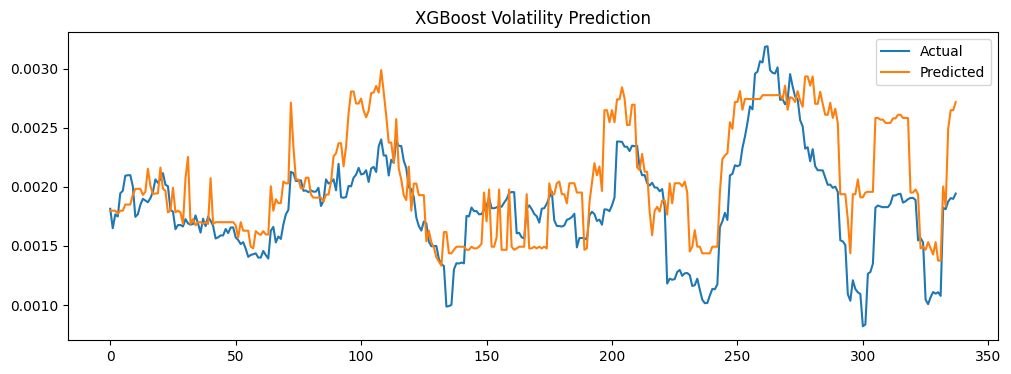

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("XGBoost Volatility Prediction")
plt.legend()
plt.show()


R²: 0.9595
RMSE: 0.0001


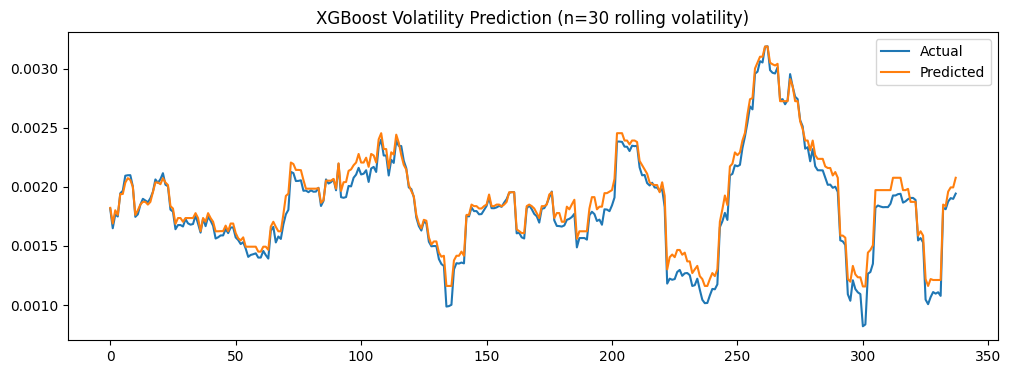

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Feature selection and dropna
df = single_index_df.dropna().copy()

features = [col for col in df.columns if col != 'volatility (n=30)']
target = 'volatility (n=20)'

X = df[features]
y = df[target]


# Step 2: Train/test split (chronologically)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False
)

# Step 3: Feature scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train XGBoost with your hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Step 6: Plot actual vs predicted
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("XGBoost Volatility Prediction (n=30 rolling volatility)")
plt.legend()
plt.show()


<ipython-input-32-4400b2b55c96>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-32-4400b2b55c96>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-32-4400b2b55c96>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

PCA reduced dimensionality to: 24 components

✅ Results with PCA:
R²: -6.6252
RMSE: 0.0012


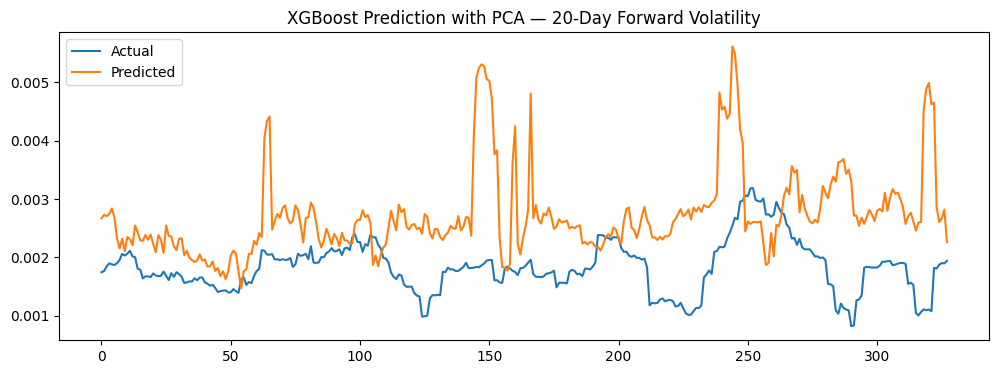

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Function to generate lagged features
def create_lagged_features(df, lag=20, target_shift=20, target_col='volatility (n=20)'):
    df = df.dropna().copy()
    feature_cols = [col for col in df.columns if col != target_col]

    lagged_data = pd.DataFrame()
    for col in feature_cols:
        for i in range(1, lag + 1):
            lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)

    lagged_data['target_volatility'] = df[target_col].shift(-target_shift)
    return lagged_data.dropna()

# Step 2: Create supervised learning dataset
supervised_df = create_lagged_features(single_index_df, lag=20, target_shift=20, target_col='volatility (n=20)')

X = supervised_df.drop(columns=['target_volatility'])
y = supervised_df['target_volatility']

# Step 3: Chronological split (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Step 4: Scale features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Apply PCA (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced dimensionality to: {X_train_pca.shape[1]} components")

# Step 6: Train XGBoost with your preferred hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_pca, y_train)

# Step 7: Predict and evaluate
y_pred = xgb_model.predict(X_test_pca)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n✅ Results with PCA:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Step 8: Plot predictions
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("XGBoost Prediction with PCA — 20-Day Forward Volatility")
plt.legend()
plt.show()


In [ ]:
def create_lagged_features(df, lag=20, target_shift=20, target_col='volatility'):
    df = df.dropna().copy()
    feature_cols = [col for col in df.columns if col != target_col]

    lagged_data = pd.DataFrame()

    # Add lagged features for each column (excluding target)
    for col in feature_cols:
        for i in range(1, lag + 1):
            lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)

    # Target: volatility shifted 20 steps *ahead*
    lagged_data['target_volatility'] = df[target_col].shift(-target_shift)

    # Drop rows with NaNs caused by shifting
    lagged_data = lagged_data.dropna()

    return lagged_data



In [ ]:
# Create lagged features
supervised_df = create_lagged_features(single_index_df, lag=20, target_shift=20, target_col='volatility')

# Split into features and target
X = supervised_df.drop(columns=['target_volatility'])
y = supervised_df['target_volatility']

# Chronological train/test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

print(f"R²: {r2_score(y_test, y_pred):.4f}")


<ipython-input-29-7c0e4b45f647>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-29-7c0e4b45f647>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-29-7c0e4b45f647>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

KeyError: 'volatility'

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Function to generate past 20-day lag features and future target volatility
def create_lagged_features(df, lag=30, target_shift=10, target_col='volatility (n=20)'):
    df = df.dropna().copy()
    feature_cols = [col for col in df.columns if col != target_col]

    lagged_data = pd.DataFrame()

    for col in feature_cols:
        for i in range(1, lag + 1):
            lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)

    # Shift target 20 days into the future
    lagged_data['target_volatility'] = df[target_col].shift(-target_shift)

    lagged_data = lagged_data.dropna()
    return lagged_data

# Step 1: Create lagged dataset
supervised_df = create_lagged_features(single_index_df, lag=20, target_shift=20, target_col='volatility (n=20)')

# Step 2: Split into features and target
X = supervised_df.drop(columns=['target_volatility'])
y = supervised_df['target_volatility']

# Step 3: Chronological train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Step 7: Visualize predictions
plt.figure(figsize=(12, 4))
plt


<ipython-input-33-eb1510a55b8e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-33-eb1510a55b8e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[f'{col}_lag_{i}'] = df[col].shift(i)
<ipython-input-33-eb1510a55b8e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

R²: -4.2403
RMSE: 0.0010


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

<Figure size 1200x400 with 0 Axes>